# Treinando POS-Taggers para sentenças da Língua Portuguesa
  
  Neste notebook será apresentado técnicas para treinamento e validação POS-Taggers para a Língua Portuguesa no Corpus Mac-Morpho, como descrito no Trabalho Prático 2.
Iremos realizar o treinamento de vários POS-taggers utilizando as ferramentas da biblioteca NLTK, para a Linguagem de Programação Python.

## Leitura da base de dados e divisão entre treino e teste
    
   Primeiramente, certifique-se de que a base de dados Mac-Morpho esteja baixada para o projeto utilizando o comando nltk.download(). O trecho de código abaixo exemplifica como a leitura da base de dados é feita:

In [13]:
import nltk
from nltk import word_tokenize
import numpy as np
import joblib
dataset = list(nltk.corpus.mac_morpho.tagged_sents())
#Exibindo uma sentença do dataset para teste
print (dataset[200])


[('"', '"'), ('Não', 'ADV'), ('há', 'V'), ('técnicos', 'N'), ('suficientes', 'ADJ'), ('"', '"'), (',', ','), ('diz', 'V'), ('Prado', 'NPROP')]


Assim como foi feito no site mac-morpho (http://nilc.icmc.usp.br/macmorpho/), a base de dados foi dividida em 80% para treino e 20% para testes:

In [ ]:
size = len(dataset)
size_train = int(np.ceil(size*.8))
train_dataset = dataset[:size_train]
test_dataset = dataset[size_train:]

# Treinamento e perfomance dos taggers   
   Foi escolhido alguns taggers para treinamento e avaliação no corpus Mac-Morpho. 
   
## Classificador Naive Bayes
   O classificador Naive Bayes é um classificador probabilístico baseado na aplicação do Teorema de Bayes, que por sua vez possui fortes premisas independentes entre as características.

In [ ]:
naive_tagger = ClassifierBasedPOSTagger(train=train_dataset)
acc_naive = naive_tagger.evaluate(test_dataset) * 100
print('''Performance do tagger:
         - ClassifierBased (Naive Bayes): {:.2f}%'''.format(acc_naive))

Com o treinamento de duração de aproximadamente 10 minutos, o modelo foi treinado na base de dados de treino e avaliado no conjunto de testes, obtendo uma acurácia de 83.97%. Um bom resultado.

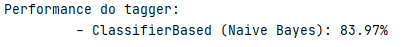


## Tagger Default, Unigram, Bigram e Trigram
O Tagger Default é um tagger baseline que "chuta" o mesmo token para todos os tokens do texto. Ele é util para conhecer melhor a base de dados que estamos trabalhando. Nesse notebook ele foi usado em cima do conjunto de treino e obteve uma acurácia de 20% classificando com o token "N" (Nome no Mac-Morpho), ou seja, podemos dizer que 1 em cada 5 palavras possui a tag de Nome, na base de treino.

In [ ]:
taggerDefault = nltk.DefaultTagger('N')
acc_taggerDefault = taggerDefault.evaluate(train_dataset)*100
print('''Performance do tagger:
        -  Tagger Default: {:.2f}%'''.format(acc_taggerDefault))

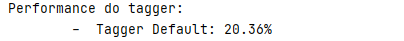

O Tagger Unigram realiza a classificação a partir de uma única palavra como contexto, como o próprio nome diz. O Tagger Unigram foi utilizado para clasificar o conjunto de testes, obtendo um resultado de aproximadamente 80% de acurácia.

In [ ]:
taggerUni = nltk.UnigramTagger(train=train_dataset)
acc_uni = taggerUni.evaluate(test_dataset) * 100
print('''Performance do tagger:
        -  Tagger Unigram: {:.2f}%'''.format(acc_uni))

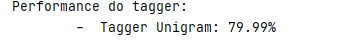

De forma semelhante, o Tagger Bigram também é utilizado para classificação mas desta vez utiliza duas palavras anteriores (tags) como parte contexto ao invés de apenas uma. Utilizando o tagger do unigram como backoff, a acurácia obteve uma leve melhoria:

In [ ]:
taggerUni = nltk.UnigramTagger(train=train_dataset)
taggerBi = nltk.BigramTagger(train=train_dataset,backoff=taggerUni)
acc_bi = taggerBi.evaluate(test_dataset) * 100
print('''Performance do tagger:
        -  Tagger Bigram + Unigram (backoff): {:.2f}%'''.format(acc_bi))

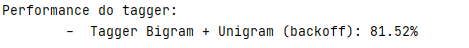

E por fim, o Tagger Trigram realiza o mesmo procedimento de seus anteriores com a unica mudança de utilizar as 3 tags anteriores. O tagger tambem foi treinado utilizando o Unigram como backoff mas não obteve resultados melhores em relação ao Bigram.

In [ ]:
taggerUni = nltk.UnigramTagger(train=train_dataset)
taggerTri = nltk.TrigramTagger(train=train_dataset,backoff=taggerUni)
acc_tri = taggerTri.evaluate(test_dataset) * 100
print('''Performance do tagger:
        -  Tagger Trigram + Unigram (backoff): {:.2f}%'''.format(acc_tri))

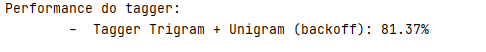

## Avaliando o modelo com outra métricas: Precision, recall, F1-score e support
A acurácia é uma boa métrica para dizer quantos acerto o modelo obteve mas há outras métricas que podem nos dar maiores detalhes. Nesta seção, utilizaremos as métricas precisão, revocação, F1-score e o suporte no classificador Naive Bayes (que obteve a maior acurácia entre os treinados) para cada classe gramatical (tag) da base de dados Mac-Morpho.

In [1]:
import nltk
import numpy as np
from nltk import ClassifierBasedPOSTagger
dataset = list(nltk.corpus.mac_morpho.tagged_sents())
size = len(dataset)
size_train = int(np.ceil(size*.8))
train_dataset = dataset[:size_train]
test_dataset = dataset[size_train:]
naive_tagger = ClassifierBasedPOSTagger(train=train_dataset)
tagged_sentences = dataset
i = int(len(tagged_sentences)*0.2)
train_sentences = tagged_sentences[i:]
test_sentences = tagged_sentences[:i]
tagged_test_sentences = naive_tagger.tag_sents([[token for token,tag in sent] for sent in test_sentences])
gold = [str(tag) for sentence in test_sentences for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
from sklearn import metrics
print(metrics.classification_report(gold, pred,zero_division= True))

              precision    recall  f1-score   support

           !       1.00      1.00      1.00        16
           "       1.00      1.00      1.00      3427
           $       1.00      1.00      1.00         7
           '       0.98      0.98      0.98        48
           (       1.00      1.00      1.00      1643
           )       1.00      1.00      1.00      1640
           ,       1.00      1.00      1.00     12957
           -       1.00      1.00      1.00       459
           .       0.68      1.00      0.81        13
         ...       1.00      1.00      1.00         1
           /       0.93      1.00      0.96        13
           :       1.00      1.00      1.00       672
           ;       1.00      1.00      1.00       166
           ?       1.00      1.00      1.00       112
         ADJ       0.91      0.97      0.94      9317
     ADJ|EST       0.78      0.75      0.76        28
         ADV       0.84      0.94      0.88      4872
      ADV-KS       0.93    

Desta maneira, podemos obter algumas informações interessantes que nos ajudar a avaliar o modelo mais ainda, como por exemplo: A tag que o modelo mais errou foi a IN (Interjeição), com apenas 0.38 de precisão!

Notebook feito por: Leonardo Santos Miranda - UFMG - MESTRADO para o Trabalho Prático 2 da disciplina de NLP.